# LDA

In [1]:
#Import Libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from gensim import matutils, models, corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df_1=pd.read_csv("Clean_scraped_data.csv")

In [3]:
df_1

,Title,Description,Link,Combined_Text
0,Moderate Dems silent as Biden skirts Senate co...,Senate Democrats were silent when asked by Fox...,/politics/moderate-dems-silent-biden-skirts-se...,Moderate Dems silent as Biden skirts Senate co...
1,DC jury orders conservative commentator to pay...,Two conservative commentators were found guilt...,/politics/dc-jury-orders-conservative-commenta...,DC jury orders conservative commentator to pay...
2,AOC declares victory in fight for Green New De...,Rep Alexandria OcasioCortez declared victory i...,/politics/aoc-declares-victory-fight-green-new...,AOC declares victory in fight for Green New De...
3,Why gas stove owners should still be worried,The Biden administration is backtracking on en...,/opinion/why-gas-stove-owners-should-still-wor...,Why gas stove owners should still be worried T...
4,State AGs warn Bidens natural gas moratorium v...,FIRST ON FOX A group of nearly two dozen state...,/politics/state-ags-warn-bidens-natural-gas-mo...,State AGs warn Bidens natural gas moratorium v...
...,...,...,...,...
245,John Kerrys climate office faces GOP Oversight...,FIRST ON FOX The House Oversight Committee is ...,/politics/john-kerrys-climate-office-faces-gop...,John Kerrys climate office faces GOP Oversight...
246,Bidens latest climate rules crack down on manu...,The Environmental Protection Agency unveiled a...,/politics/bidens-latest-climate-rules-crack-do...,Bidens latest climate rules crack down on manu...
247,Biden admin sued for hiding John Kerrys staff ...,FIRST ON FOX The Biden administration was hit ...,/politics/biden-admin-sued-hiding-john-kerrys-...,Biden admin sued for hiding John Kerrys staff ...
248,TikTok activist says he advised White House on...,A climate change activist who has a large foll...,/politics/tiktok-activist-says-he-advised-whit...,TikTok activist says he advised White House on...


In [4]:
# Tokenize and preprocess the text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply text preprocessing to the 'Combined_Text' column
df_1['preprocessed_text'] = df_1['Combined_Text'].apply(preprocess_text)

# Create CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the preprocessed text
count_matrix = count_vectorizer.fit_transform(df_1['preprocessed_text'])

# Convert count matrix to DataFrame
count_df_1 = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Add column names
count_df_1.columns = count_vectorizer.get_feature_names_out()

In [5]:
lda_df=count_df_1

In [6]:
# Convert the DataFrame to a matrix
dtm_matrix = count_df_1.values

# Convert the matrix to a format compatible with gensim
corpus = matutils.Dense2Corpus(dtm_matrix.T)

# Create a dictionary mapping of terms to their index
terms = count_df_1.columns.tolist()
dictionary = corpora.Dictionary.from_corpus(corpus, id2word=dict(enumerate(terms)))

# Train LDA model
lda_model = models.LdaModel(corpus=corpus, num_topics=5, id2word=dictionary, passes=15)

# Visualize the LDA model
lda_visualization = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_visualization)

In [7]:
# Save the file as HTML
#pyLDAvis.save_html(lda_visualization, 'LDA_visualization_interactive.html')

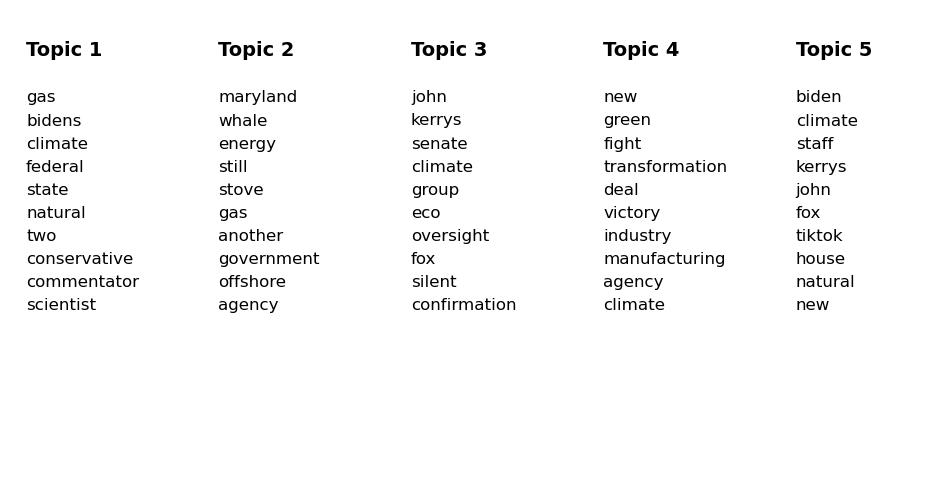

In [8]:
# Create a plot with boxes for each topic
num_topics = len(lda_model.show_topics())
num_cols =   5
num_rows = (num_topics + num_cols - 1) // num_cols  
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

for i, (topic_num, topic_terms) in enumerate(lda_model.show_topics()):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col] if num_rows > 1 else axs[col]
    ax.text(0.1, 0.9, f"Topic {topic_num + 1}", fontsize=14, fontweight='bold')
    ax.axis('off')
    terms = [term.split('*')[1].strip().replace('"', '') for term in topic_terms.split('+')]
    for j, term in enumerate(terms):
        ax.text(0.1, 0.8 - j * 0.05, term, fontsize=12)